In [1]:
!pip install fastai


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
print(path)

/home/martin/.fastai/data/oxford-iiit-pet/images


For whatever reason, in the sample images, the filenames of dog images begin with a lower case letter and the filenames of cat images begin with an upper case letter

In [3]:
def is_cat(filename):
    return filename[0].isupper()


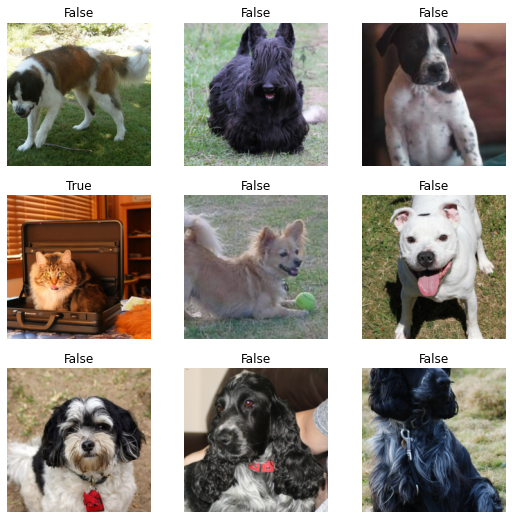

In [4]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


/home/martin/notebook/jupyterenv/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/home/martin/notebook/jupyterenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
from ipywidgets import FileUpload
uploader = FileUpload()
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat? {is_cat}")
print(f"Confidence that this is a cat is {probs}")